In [25]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import locale
import random

Transactions Over Time

In [27]:
#Data cleaning
date_format = '%H:%M:%S'
closed_checks = pd.read_csv('C:/Users/tmanett/Desktop/Grab & Go/Closed Checks (7).csv',  skiprows=3, date_format=date_format) #Skips first 3 rows in csv when loading in df 
closed_checks['Check Duration'] = pd.to_timedelta(closed_checks['Check Duration'], unit='h') #Since database gave us "Check Duration" in hours, this converts it back to seconds in '%H:%M:%S' format
closed_checks['Check Duration'] = closed_checks['Check Duration'].apply(lambda x: str(x)[7:]) #The above command worked but each value began with "0 days...", so we used lamda fucntion to convert column to string, and then a string slicer to get rid of unwanted characters
closed_checks['value'] = 1 

closed_checks['Opened Date and Time'] = closed_checks['Opened Date and Time'].astype('datetime64[ns]') #Converts "Open Date and Time" columns to date object
closed_checks.set_index('Opened Date and Time', inplace=True) #Sets "Open Date and Time" column as index

dates_of_interest = ['2023-06-08', '2023-06-20', '2023-06-25', '2023-07-02', '2023-07-03', '2023-07-14'] #Specify dates in which an event occurred

closed_checks['Date'] = closed_checks.index.date.astype(str) # Create new column dor Dates, and convert dates to srting values so we can filter with list of dates in string form
closed_checks = closed_checks[closed_checks['Date'].isin(dates_of_interest)] #Get dates from list

closed_checks.info()
closed_checks.drop(columns='Date', inplace=True) #Drop the column now to clean dataframe
closed_checks


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 873 entries, 2023-06-20 16:40:39 to 2023-06-08 21:29:32
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Check Number         873 non-null    int64  
 1   Revenue Center       873 non-null    object 
 2   Check Employee Name  873 non-null    object 
 3   Check Amount         873 non-null    float64
 4   Table Number         0 non-null      float64
 5   Number of Guests     873 non-null    int64  
 6   Check Duration       873 non-null    object 
 7   Added To Check       873 non-null    int64  
 8   value                873 non-null    int64  
 9   Date                 873 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 75.0+ KB


,Check Number,Revenue Center,Check Employee Name,Check Amount,Table Number,Number of Guests,Check Duration,Added To Check,value
Opened Date and Time,,,,,,,,,
2023-06-20 16:40:39,300000,QS Grab,Tonya HEADLEY,0.00,NaN,0,00:00:16.999999999,0,1
2023-06-20 16:42:59,300001,QS Grab,Tonya HEADLEY,0.00,NaN,0,00:01:23.999999998,0,1
2023-06-20 16:44:56,300002,QS Grab,Tonya HEADLEY,0.00,NaN,0,00:00:28,0,1
2023-06-20 16:45:39,300003,QS Grab,Tonya HEADLEY,0.00,NaN,0,00:00:47.999999998,0,1
2023-06-20 17:11:35,300004,QS Grab,Kevin Day,0.00,NaN,0,00:04:57,0,1
...,...,...,...,...,...,...,...,...,...
2023-06-08 20:55:59,305459,QS Grab,Kiosk Grab & Go,15.22,NaN,0,00:00:25.999999999,0,1
2023-06-08 20:56:32,305460,QS Grab,Kiosk Grab & Go,15.26,NaN,0,00:00:30.999999999,0,1
2023-06-08 20:56:13,305461,QS Grab,Kiosk Grab & Go,30.23,NaN,0,00:00:30.999999999,0,1


Sales amount for each event

C:\Users\tmanett\AppData\Local\Temp\ipykernel_20032\1355414591.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed_checks['Event Date'] = closed_checks.index.date


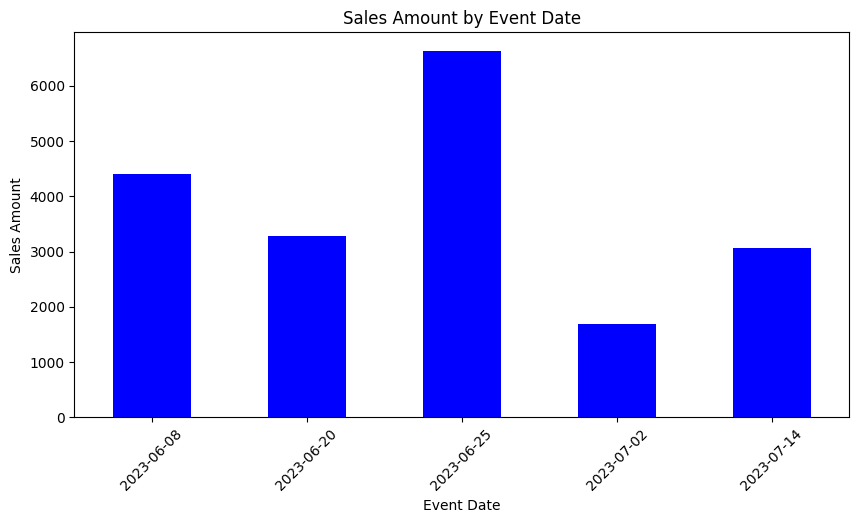

Event Date
2023-06-08    4397.63
2023-06-20    3277.43
2023-06-25    6637.94
2023-07-02    1685.30
2023-07-14    3062.63
Name: Check Amount, dtype: float64

In [28]:
#Filter out rows where Check Amount equals zero
closed_checks = closed_checks[(closed_checks['Check Amount'] >=0.1)]
closed_checks['Event Date'] = closed_checks.index.date

#Group by date of event, and sum sales amount
sales_by_date = closed_checks.groupby('Event Date')['Check Amount'].sum() # Extract the date from the index and assign it to a new column 'Event Date'

# Create the bar chart
plt.figure(figsize=(10, 5))
sales_by_date.plot(kind='bar', color='blue')
plt.xlabel('Event Date')
plt.ylabel('Sales Amount')
plt.title('Sales Amount by Event Date')
plt.xticks(rotation=45)
plt.show()

sales_by_date


Sales Volume Through Duration of Events

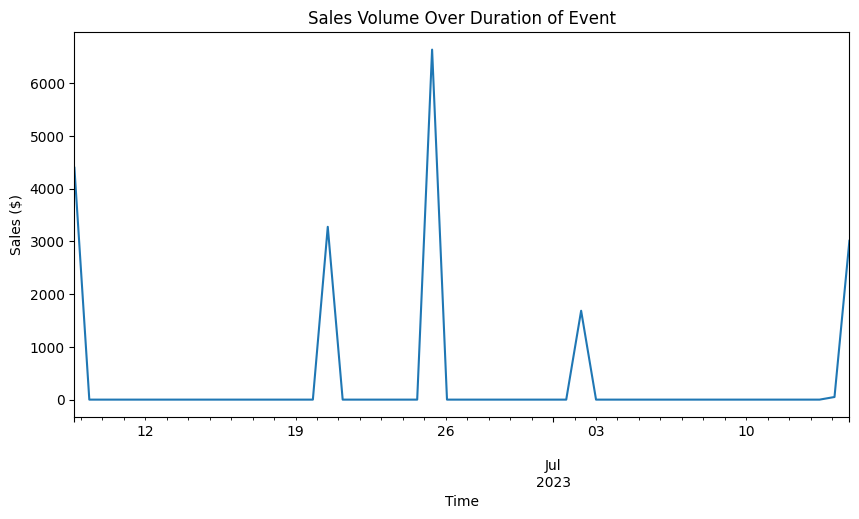

In [29]:
#Filter out rows where Check Amount equals zero
closed_checks_nonzero = closed_checks[(closed_checks['Check Amount'] >=0.1)]

#Plotting
tot = closed_checks_nonzero['Check Amount'].resample("1000min").sum().plot(style="-", figsize=(10, 5)) #Plots transaction volume over 15 min intervals of time
tot.set_xlabel('Time') #x axis
tot.set_ylabel('Sales ($)')#y axis
tot.set_title("Sales Volume Over Duration of Event") #title

plt.show()

Average Speed of Transactions

In [ ]:
#Average Speed of Transactions
avg = closed_checks
avg_check_duration = avg['Check Amount'].mean() #Calculates average speed of transaction time
print("The Average Speed of Transaction is:", avg_check_duration, "seconds")

The Average Speed of Transaction is: 31.1540701754386 seconds


Menu Mix Detail

In [ ]:
#Data importing cleaning
menu_mix = pd.read_csv('C:/Users/tmanett/Desktop/Grab & Go/Menu_MIx_Detail_Total.csv') #Load data in except last 5 rows (summary data)

menu_mix.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Business Date               434 non-null    object 
 1   Location Name               434 non-null    object 
 2   Revenue Center Name         434 non-null    object 
 3   Major Group Name            434 non-null    object 
 4   Family Group Name           434 non-null    object 
 5   Menu Item Number            434 non-null    int64  
 6   Menu Item Name              434 non-null    object 
 7   Sales Count                 434 non-null    int64  
 8   Sales Total                 434 non-null    float64
 9   Discounts Amount            434 non-null    float64
 10  Gross Sales after Discount  434 non-null    float64
dtypes: float64(3), int64(2), object(6)
memory usage: 37.4+ KB


Sales by Date, Food/Bev. Split

In [ ]:
#Clean for only the dates we want
menu_mix['Business Date'] = menu_mix['Business Date'].astype('datetime64[ns]') #Converts "Open Date and Time" columns to date object
menu_mix.set_index('Business Date', inplace=True) #Sets "Open Date and Time" column as index

menu_mix['Date'] = menu_mix.index.date.astype(str) # Create new column dor Dates, and convert dates to srting values so we can filter with list of dates in string form
menu_mix = menu_mix[menu_mix['Date'].isin(dates_of_interest)] #Get dates from list

menu_mix.info()
menu_mix.drop(columns='Date', inplace=True) #Drop the column now to clean dataframe
menu_mix

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 333 entries, 2023-03-22 to 2023-05-15
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Location Name               333 non-null    object 
 1   Revenue Center Name         333 non-null    object 
 2   Major Group Name            333 non-null    object 
 3   Family Group Name           333 non-null    object 
 4   Menu Item Number            333 non-null    int64  
 5   Menu Item Name              333 non-null    object 
 6   Sales Count                 333 non-null    int64  
 7   Sales Total                 333 non-null    float64
 8   Discounts Amount            333 non-null    float64
 9   Gross Sales after Discount  333 non-null    float64
 10  Date                        333 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 31.2+ KB


,Location Name,Revenue Center Name,Major Group Name,Family Group Name,Menu Item Number,Menu Item Name,Sales Count,Sales Total,Discounts Amount,Gross Sales after Discount
Business Date,,,,,,,,,,
2023-03-22,Scotiabank Arena,QS Grab,Food,QS Entree,82230085,"QS,CSB,Pulled Pork Sandwich",3,49.50,0.0,49.50
2023-03-22,Scotiabank Arena,QS Grab,Food,QS Entree,82230087,"QS,CSB,Brisket Sandwich",9,180.00,0.0,180.00
2023-03-22,Scotiabank Arena,QS Grab,Food,QS Entree,82230130,"QS,CSB,Meatball Sandwich",3,60.00,0.0,60.00
2023-03-22,Scotiabank Arena,QS Grab,Food,QS Entree,82230131,"QS,CSB,Porchetta Sandwich",5,100.00,0.0,100.00
2023-03-22,Scotiabank Arena,QS Grab,Food,QS Entree,82230132,"QS,CSB,Mac and Cheese",6,60.00,0.0,60.00
...,...,...,...,...,...,...,...,...,...,...
2023-05-15,Scotiabank Arena,QS Grab,Alcohol,Beer Btl Premium,82230080,"QSB,Beer,Hop Valley Bubble Stash",5,66.25,0.0,66.25
2023-05-15,Scotiabank Arena,QS Grab,Alcohol,Coolers,81161845,"QSB,Smirnoff Tallboy Cooler",38,513.00,0.0,513.00
2023-05-15,Scotiabank Arena,QS Grab,Alcohol,Coolers,81162080,"QSB,Cooler,Vizzy Raspberry Lemon",109,1471.50,0.0,1471.50


New Column, Matching Dates with Event Names

In [ ]:
dates_of_interest = ['2023-03-22', '2023-03-24', '2023-04-27', '2023-05-01', '2023-05-02', '2023-05-04', '2023-05-11', '2023-05-12', '2023-05-13', '2023-05-15'] 
#Define event names in dictionary
event_names = {
    '2023-03-22': 'Raptors vs Pacers',
    '2023-03-24': 'Raptors vs Pistons',
    '2023-04-27': 'TML vs TBL R1G5',
    '2023-05-01': 'Disturbed LIVE Event',
    '2023-05-02': 'TML vs  FP R2G1',
    '2023-05-04': 'TML vs  FP R2G2',
    '2023-05-11': 'blink-182 1st Day',
    '2023-05-12': 'WNBA',
    '2023-05-13': 'TML vs  FP R2G5',
    '2023-05-15': 'blink-182 2nd Day'
}
# Convert the index of the menu_mix DataFrame to DatetimeIndex
menu_mix.index = pd.to_datetime(menu_mix.index)

# Create a new 'Event Name' column in the menu_mix DataFrame by mapping the event names
menu_mix['Event Name'] = menu_mix.index.strftime('%Y-%m-%d').map(event_names)

# Convert the index of the menu_mix DataFrame to DatetimeIndex
menu_mix.index = pd.to_datetime(menu_mix.index)

# Create a new 'Event Name' column in the menu_mix DataFrame by mapping the event names
menu_mix['Event Name'] = menu_mix.index.strftime('%Y-%m-%d').map(event_names)

# Create a new 'Event Group' column based on the event names
menu_mix['Event Group'] = menu_mix['Event Name'].apply(lambda event: 'Raptors' if 'Raptors' in event else ('Leafs' if 'TML' in event else ('WNBA' if 'WNBA' in event else 'Live Events')))
menu_mix


,Location Name,Revenue Center Name,Major Group Name,Family Group Name,Menu Item Number,Menu Item Name,Sales Count,Sales Total,Discounts Amount,Gross Sales after Discount,Event Name,Event Group
Business Date,,,,,,,,,,,,
2023-03-22,Scotiabank Arena,QS Grab,Food,QS Entree,82230085,"QS,CSB,Pulled Pork Sandwich",3,49.50,0.0,49.50,Raptors vs Pacers,Raptors
2023-03-22,Scotiabank Arena,QS Grab,Food,QS Entree,82230087,"QS,CSB,Brisket Sandwich",9,180.00,0.0,180.00,Raptors vs Pacers,Raptors
2023-03-22,Scotiabank Arena,QS Grab,Food,QS Entree,82230130,"QS,CSB,Meatball Sandwich",3,60.00,0.0,60.00,Raptors vs Pacers,Raptors
2023-03-22,Scotiabank Arena,QS Grab,Food,QS Entree,82230131,"QS,CSB,Porchetta Sandwich",5,100.00,0.0,100.00,Raptors vs Pacers,Raptors
2023-03-22,Scotiabank Arena,QS Grab,Food,QS Entree,82230132,"QS,CSB,Mac and Cheese",6,60.00,0.0,60.00,Raptors vs Pacers,Raptors
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-15,Scotiabank Arena,QS Grab,Alcohol,Beer Btl Premium,82230080,"QSB,Beer,Hop Valley Bubble Stash",5,66.25,0.0,66.25,blink-182 2nd Day,Live Events
2023-05-15,Scotiabank Arena,QS Grab,Alcohol,Coolers,81161845,"QSB,Smirnoff Tallboy Cooler",38,513.00,0.0,513.00,blink-182 2nd Day,Live Events
2023-05-15,Scotiabank Arena,QS Grab,Alcohol,Coolers,81162080,"QSB,Cooler,Vizzy Raspberry Lemon",109,1471.50,0.0,1471.50,blink-182 2nd Day,Live Events


In [ ]:
menu_mix['Revenue_per_Basket'] = menu_mix['Sales Total'] / menu_mix['Sales Count']
# Calculate average revenue, average basket size, and number of transactions for each event group
event_group_stats = menu_mix.groupby('Event Group').agg({
    'Sales Total': 'mean',          # Replace 'Sales Total' with the appropriate revenue column name
    'Sales Count': 'mean',          # Basket size based on the sales count
    'Revenue_per_Basket': 'mean'
}).reset_index()

In [ ]:
event_group_stats

,Event Group,Sales Total,Sales Count,Revenue_per_Basket
0,Leafs,91.754777,7.133758,12.402244
1,Live Events,240.711402,17.532710,11.649720
2,Raptors,73.058333,5.433333,12.733333
3,WNBA,105.326923,7.897436,12.583333


Food vs Alcohol

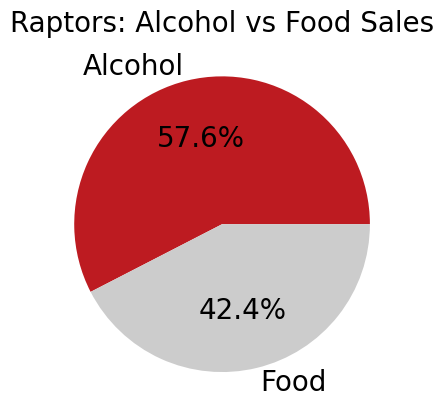

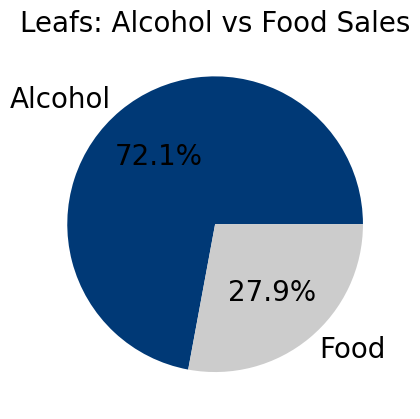

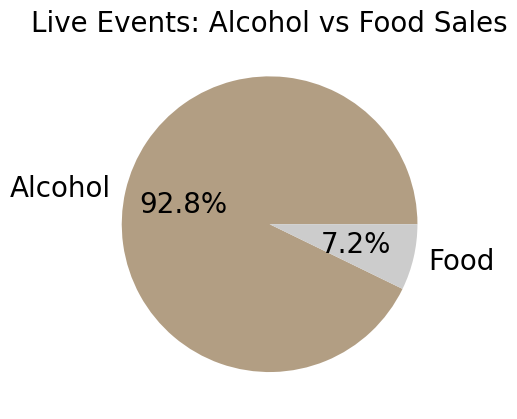

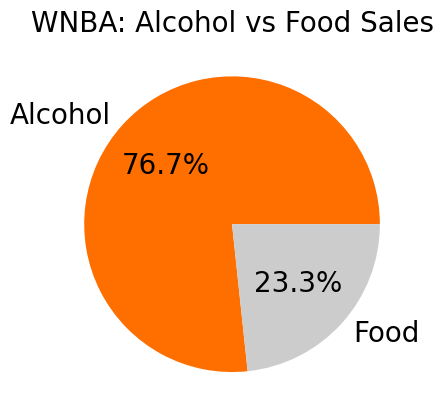

In [ ]:
# Filter the DataFrame for Raptors, Leafs, WNBA, and Live Events
raptors_df = menu_mix[menu_mix['Event Group'] == 'Raptors']
leafs_df = menu_mix[menu_mix['Event Group'] == 'Leafs']
wnba_df = menu_mix[menu_mix['Event Group'] == 'WNBA']
live_events_df = menu_mix[menu_mix['Event Group'] == 'Live Events']

# Calculate the total sales revenue for alcohol and food for each event group
raptors_alcohol_sales = raptors_df[raptors_df['Major Group Name'] == 'Alcohol']['Sales Total'].sum()
raptors_food_sales = raptors_df[raptors_df['Major Group Name'] == 'Food']['Sales Total'].sum()

leafs_alcohol_sales = leafs_df[leafs_df['Major Group Name'] == 'Alcohol']['Sales Total'].sum()
leafs_food_sales = leafs_df[leafs_df['Major Group Name'] == 'Food']['Sales Total'].sum()

wnba_alcohol_sales = wnba_df[wnba_df['Major Group Name'] == 'Alcohol']['Sales Total'].sum()
wnba_food_sales = wnba_df[wnba_df['Major Group Name'] == 'Food']['Sales Total'].sum()

live_events_alcohol_sales = live_events_df[live_events_df['Major Group Name'] == 'Alcohol']['Sales Total'].sum()
live_events_food_sales = live_events_df[live_events_df['Major Group Name'] == 'Food']['Sales Total'].sum()

# Prepare data for pie charts
raptors_values = [raptors_alcohol_sales, raptors_food_sales]
leafs_values = [leafs_alcohol_sales, leafs_food_sales]
wnba_values = [wnba_alcohol_sales, wnba_food_sales]
live_events_values = [live_events_alcohol_sales, live_events_food_sales]

# Prepare labels for pie charts
raptors_labels = ['Alcohol', 'Food']
leafs_labels = ['Alcohol', 'Food']
wnba_labels = ['Alcohol', 'Food']
live_events_labels = ['Alcohol', 'Food']

# Define colors for each event group
leafs_colors = ['#003976', '#CCCCCC']  # Blue and Grey
raptors_colors = ['#BD1B21', '#CCCCCC']  # Red and Grey
live_events_colors = ['#B29E83', '#CCCCCC']  # Light Brown and Grey
wnba_colors = ['#FF6F00', '#CCCCCC']  # Orange and Grey

# Create the pie charts with custom colors
fig1, ax1 = plt.subplots()
ax1.pie(raptors_values, labels=raptors_labels, autopct='%1.1f%%', textprops={'fontsize': 20}, colors=raptors_colors)
ax1.set_title('Raptors: Alcohol vs Food Sales', fontsize= 20)

fig2, ax2 = plt.subplots()
ax2.pie(leafs_values, labels=leafs_labels, autopct='%1.1f%%', textprops={'fontsize': 20}, colors=leafs_colors)
ax2.set_title('Leafs: Alcohol vs Food Sales', fontsize= 20)

fig3, ax3 = plt.subplots()
ax3.pie(live_events_values, labels=live_events_labels, autopct='%1.1f%%', textprops={'fontsize': 20}, colors=live_events_colors)
ax3.set_title('Live Events: Alcohol vs Food Sales', fontsize= 20)

fig4, ax4 = plt.subplots()
ax4.pie(wnba_values, labels=wnba_labels, autopct='%1.1f%%', textprops={'fontsize': 20}, colors=wnba_colors)
ax4.set_title('WNBA: Alcohol vs Food Sales', fontsize= 20)


# Display the pie charts
plt.show()


### Revenue by Event
Add percentages
acutal number at top at of each bar

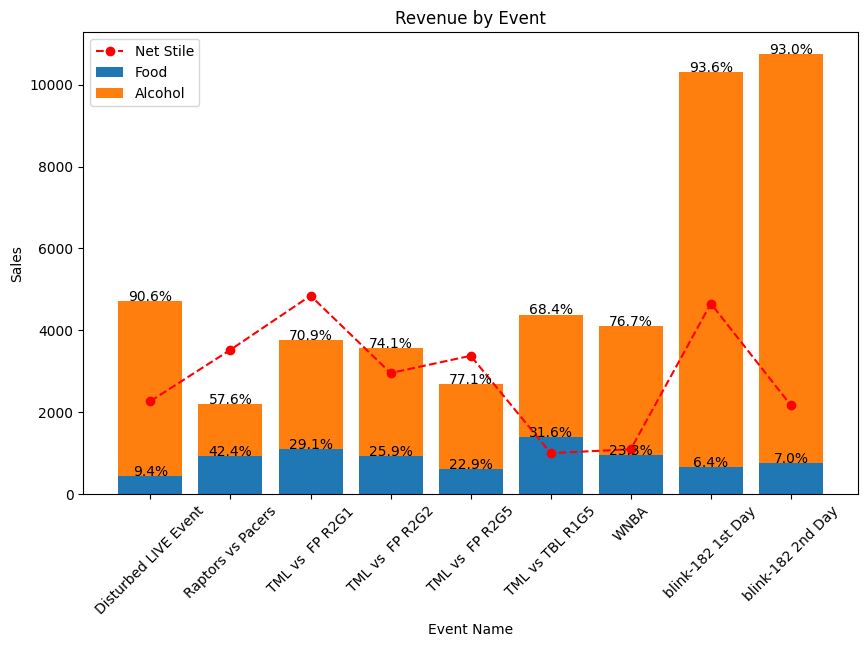

In [ ]:
# Group the menu_mix dataframe by 'Event Name' and 'Major Group Name', and select the 'Sales Total' column
sales_by_event = menu_mix.groupby(['Event Name', 'Major Group Name'])['Sales Total'].sum()

event_names_list = sales_by_event.index.get_level_values('Event Name').unique().tolist()

# Filter the sales data for the specified event names and major group names 'Food' and 'Alcohol'
food_sales_by_event = sales_by_event.loc[event_names_list, 'Food']
alcohol_sales_by_event = sales_by_event.loc[event_names_list, 'Alcohol']

# Get the unique event names
event_names = food_sales_by_event.index.get_level_values('Event Name')

# Reset indices for food_sales_by_event and alcohol_sales_by_event
food_sales_by_event = food_sales_by_event.reset_index(drop=True)
alcohol_sales_by_event = alcohol_sales_by_event.reset_index(drop=True)

# Calculate the total sales for each event
total_sales_by_event = food_sales_by_event + alcohol_sales_by_event

# Calculate the percentage of food sales and alcohol sales for each event
food_sales_percentage = (food_sales_by_event / total_sales_by_event) * 100
alcohol_sales_percentage = (alcohol_sales_by_event / total_sales_by_event) * 100

# Replace NaN values with 0 for events with zero sales
food_sales_percentage = food_sales_percentage.fillna(0)
alcohol_sales_percentage = alcohol_sales_percentage.fillna(0)

# Generate random net sales for each event
net_stile_by_event = [random.randint(1000, 5000) for _ in range(len(event_names))]

# Plot the bar graph
fig, ax = plt.subplots(figsize=(10, 6))

# Create a bar for food sales
ax.bar(event_names, food_sales_by_event, label='Food')

# Create a bar for alcohol sales, stacked on top of food sales
ax.bar(event_names, alcohol_sales_by_event, bottom=food_sales_by_event, label='Alcohol')

# Add the percentage labels above each bar
for i, event_name in enumerate(event_names):
    ax.text(event_name, food_sales_by_event[i] + 5, f'{food_sales_percentage[i]:.1f}%', ha='center')
    ax.text(event_name, food_sales_by_event[i] + alcohol_sales_by_event[i] + 5, f'{alcohol_sales_percentage[i]:.1f}%', ha='center')

# Plot the line for net sales
ax.plot(event_names, net_stile_by_event, color='red', linestyle='--', marker='o', label='Net Stile')    

ax.legend()
ax.set_xlabel('Event Name')
ax.set_ylabel('Sales')
ax.set_title('Revenue by Event')

plt.xticks(rotation=45)
plt.show()


Average Basket Size Per Game

In [30]:
# Define event names in dictionary
event_names = {
    '2023-06-08': 'Paramore',
    '2023-06-20': 'Stevie Nicks',
    '2023-06-25': 'AEW x NJPW',
    '2023-07-02': 'TWICE',
    '2023-07-14': 'Alicia Keys'
}

# Data importing and cleaning
date_format = '%H:%M:%S'
grabngo_df = pd.read_csv('C:/Users/tmanett/Desktop/Grab & Go/OBI Ops .MV (2).csv', parse_dates=['Business Date'], date_format=date_format)
grabngo_df = grabngo_df.loc[:, ~grabngo_df.columns.str.contains('^Unnamed')]
grabngo_df.dropna(inplace=True)
grabngo_df['Checks Count'] = grabngo_df['Checks Count'].astype('float')
grabngo_df['Quarter Hour'] = grabngo_df['Quarter Hour'].astype('int')
grabngo_df['Net Sales'] = grabngo_df['Net Sales'].astype('float')

grabngo_df['Business Date'] = pd.to_datetime(grabngo_df['Business Date'])
grabngo_df['Event Name'] = grabngo_df['Business Date'].dt.strftime('%Y-%m-%d').map(event_names)

grabngo_df = grabngo_df[grabngo_df['Business Date'].dt.strftime('%Y-%m-%d').isin(dates_of_interest)]

grabngo_df['Event Name'] = pd.Categorical(grabngo_df['Event Name'], categories=event_names.values(), ordered=True)

grabngo_df.info()
grabngo_df


<class 'pandas.core.frame.DataFrame'>
Index: 307 entries, 0 to 341
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Business Date        307 non-null    datetime64[ns]
 1   Business Hour        307 non-null    object        
 2   Quarter Hour         307 non-null    int32         
 3   Location Name        307 non-null    object        
 4   Revenue Center Name  307 non-null    object        
 5   Net Sales            307 non-null    float64       
 6   Checks Count         307 non-null    float64       
 7   Event Name           279 non-null    category      
dtypes: category(1), datetime64[ns](1), float64(2), int32(1), object(3)
memory usage: 18.5+ KB


,Business Date,Business Hour,Quarter Hour,Location Name,Revenue Center Name,Net Sales,Checks Count,Event Name
0,2023-06-08,14,60,Scotiabank Arena,QS Grab,0.00,0.0,Paramore
1,2023-06-08,15,61,Scotiabank Arena,QS Grab,0.00,1.0,Paramore
2,2023-06-08,16,68,Scotiabank Arena,QS Grab,0.00,0.0,Paramore
3,2023-06-08,17,70,Scotiabank Arena,QS Grab,0.00,0.0,Paramore
4,2023-06-08,17,71,Scotiabank Arena,QS Grab,0.00,0.0,Paramore
...,...,...,...,...,...,...,...,...
337,2023-07-14,21,88,Scotiabank Arena,QS Stand 9,450.70,21.0,Alicia Keys
338,2023-07-14,22,89,Scotiabank Arena,Beer Portable 108,18.00,1.0,Alicia Keys
339,2023-07-14,22,89,Scotiabank Arena,QS Stand 9,233.35,19.0,Alicia Keys
340,2023-07-14,22,90,Scotiabank Arena,QS Stand 9,36.75,4.0,Alicia Keys


In [31]:
# Create a new 'Event Group' column based on the event names
grabngo_df['Event Group'] = grabngo_df['Event Name'].apply(lambda event: 'Raptors' if 'Raptors' in event else ('Leafs' if 'TML' in event else ('WNBA' if 'WNBA' in event else 'Live Events')))
grabngo_df


,Business Date,Business Hour,Quarter Hour,Location Name,Revenue Center Name,Net Sales,Checks Count,Event Name,Event Group
0,2023-06-08,14,60,Scotiabank Arena,QS Grab,0.00,0.0,Paramore,Live Events
1,2023-06-08,15,61,Scotiabank Arena,QS Grab,0.00,1.0,Paramore,Live Events
2,2023-06-08,16,68,Scotiabank Arena,QS Grab,0.00,0.0,Paramore,Live Events
3,2023-06-08,17,70,Scotiabank Arena,QS Grab,0.00,0.0,Paramore,Live Events
4,2023-06-08,17,71,Scotiabank Arena,QS Grab,0.00,0.0,Paramore,Live Events
...,...,...,...,...,...,...,...,...,...
337,2023-07-14,21,88,Scotiabank Arena,QS Stand 9,450.70,21.0,Alicia Keys,Live Events
338,2023-07-14,22,89,Scotiabank Arena,Beer Portable 108,18.00,1.0,Alicia Keys,Live Events
339,2023-07-14,22,89,Scotiabank Arena,QS Stand 9,233.35,19.0,Alicia Keys,Live Events
340,2023-07-14,22,90,Scotiabank Arena,QS Stand 9,36.75,4.0,Alicia Keys,Live Events


Revenue of QS Grab

In [32]:
grabngo_df['Basket Size'] = grabngo_df['Net Sales'] / grabngo_df['Checks Count']

#Get the number of transactions per event
revenue_center_sales = grabngo_df[grabngo_df['Revenue Center Name'] == 'QS Grab ']
revenue_center_sales = revenue_center_sales.groupby('Event Name')['Net Sales'].sum()

revenue_center_sales

Event Name
Paramore        3862.75
Stevie Nicks    2872.79
AEW x NJPW      5810.75
TWICE           1480.50
Alicia Keys     2693.25
Name: Net Sales, dtype: float64

Revenue of QS Grab vs Other Vendors

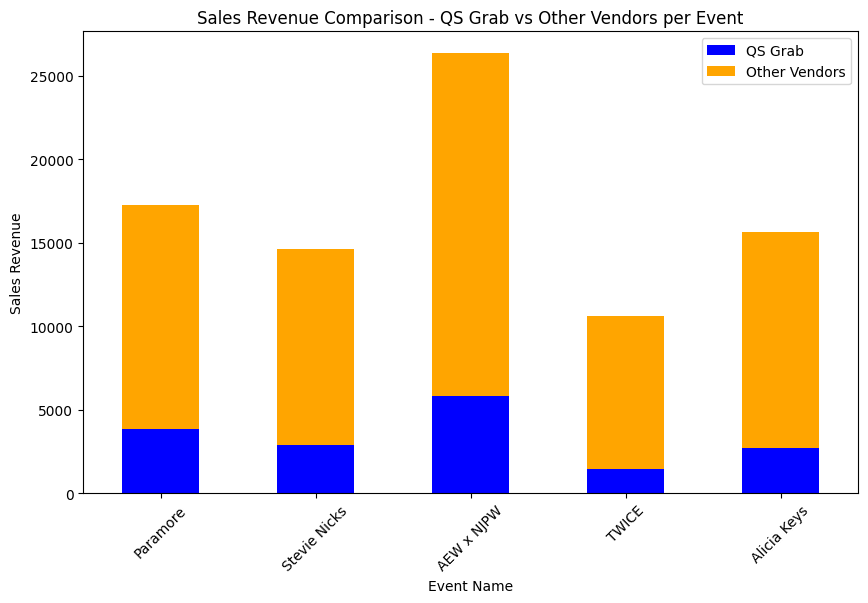

In [33]:
# Define the colors for QS Grab and Other Vendors
qs_grab_color = 'blue'
other_vendors_color = 'orange'

# Filter the grab n go data for QS Grab and other vendors
qs_grab_sales = grabngo_df[grabngo_df['Revenue Center Name'] == 'QS Grab ']
other_vendors_sales = grabngo_df[grabngo_df['Revenue Center Name'].isin(['Beer Portable 108', 'Vending 109', 'QS Stand 9'])]

# Group the sales data by event name and calculate the sum
qs_grab_sales_per_event = qs_grab_sales.groupby('Event Name')['Net Sales'].sum()
other_vendors_sales_per_event = other_vendors_sales.groupby('Event Name')['Net Sales'].sum()

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the bar graph with color coding
qs_grab_sales_per_event.plot(kind='bar', label='QS Grab', color=qs_grab_color)
other_vendors_sales_per_event.plot(kind='bar', label='Other Vendors', bottom=qs_grab_sales_per_event, color=other_vendors_color)

# Set the title and labels
plt.title('Sales Revenue Comparison - QS Grab vs Other Vendors per Event')
plt.xlabel('Event Name')
plt.ylabel('Sales Revenue')
plt.legend()

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

Count of Transactions By Event (QS Grab)

In [34]:
#Get the number of transactions per event
number_of_transactions = grabngo_df[grabngo_df['Revenue Center Name'] == 'QS Grab ']
number_of_transactions = number_of_transactions.groupby('Event Name')['Checks Count'].sum()

number_of_transactions.loc['Raptors vs Pacers'] = 106  # Replace '10' with the desired number of transactions for this event
number_of_transactions.loc['Raptors vs Pistons'] = 106  # Replace '15' with the desired number of transactions for this event

number_of_transactions

Event Name
Paramore              189.0
Stevie Nicks          133.0
AEW x NJPW            273.0
TWICE                  85.0
Alicia Keys           142.0
Raptors vs Pacers     106.0
Raptors vs Pistons    106.0
Name: Checks Count, dtype: float64

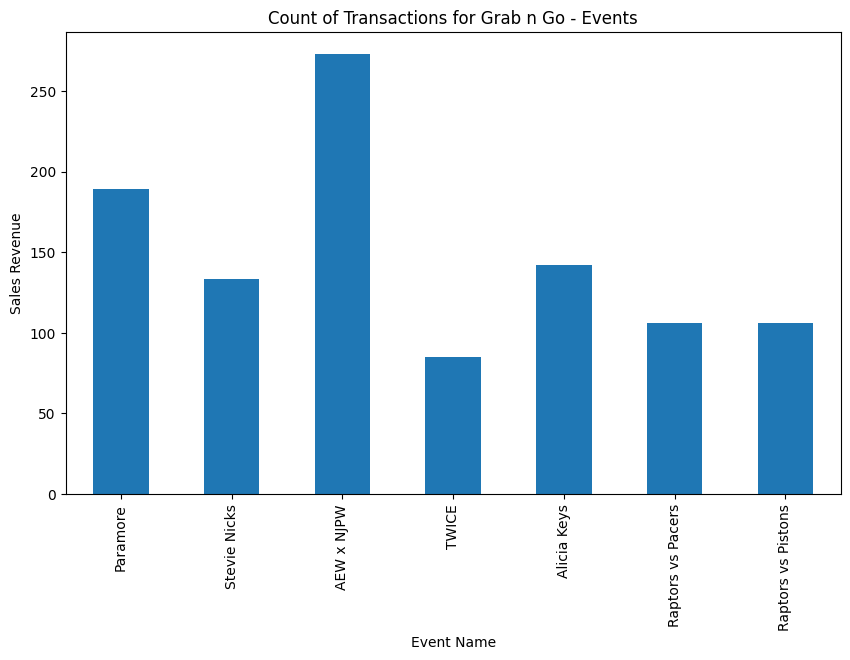

In [35]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the bar graph
number_of_transactions.plot(kind='bar')

# Set the title and labels
plt.title('Count of Transactions for Grab n Go - Events')
plt.xlabel('Event Name')
plt.ylabel('Sales Revenue')

# Display the plot
plt.show()

In [36]:
# Filter the grab n go data for QS Grab and other vendors
qs_grab_count = grabngo_df[grabngo_df['Revenue Center Name'] == 'QS Grab ']
other_vendors_count = grabngo_df[grabngo_df['Revenue Center Name'].isin(['Beer Portable 108', 'Vending 109', 'QS Stand 9'])]

# Group the sales data by event name and date, and calculate the sum
qs_grab_count_per_event = qs_grab_count.groupby(['Event Name'])['Checks Count'].sum().reset_index()
other_vendors_count_per_event = other_vendors_count.groupby(['Event Name', 'Business Date'])['Checks Count'].sum().reset_index()

qs_grab_count_per_event

,Event Name,Checks Count
0,Paramore,189.0
1,Stevie Nicks,133.0
2,AEW x NJPW,273.0
3,TWICE,85.0
4,Alicia Keys,142.0


Count of Transactions for QS Grab vs Other Vendors

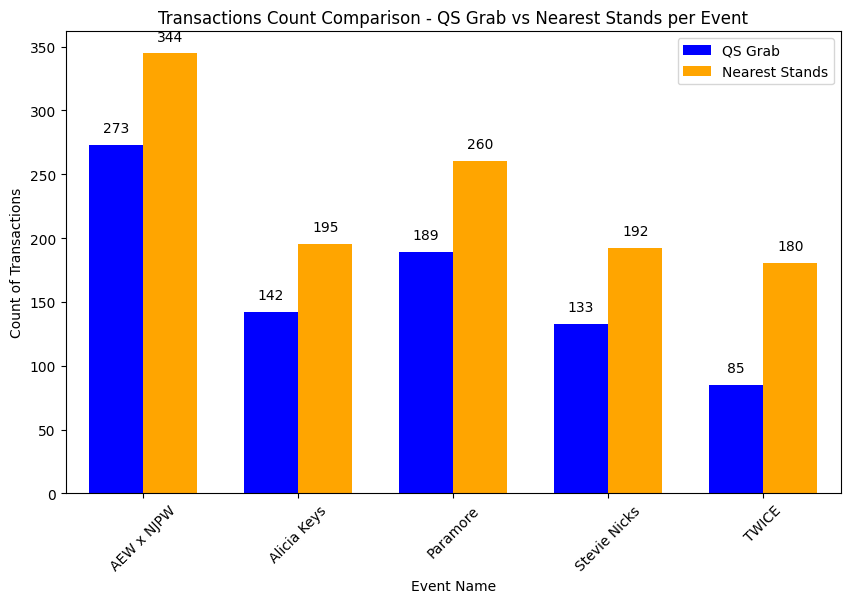

In [41]:
# Filter the grab n go data for QS Grab and other vendors
qs_grab_count = grabngo_df[grabngo_df['Revenue Center Name'] == 'QS Grab ']
other_vendors_count = grabngo_df[grabngo_df['Revenue Center Name'].isin(['Beer Portable 108', 'Vending 109', 'QS Stand 9'])]

# Group the sales data by event name and date, and calculate the sum
qs_grab_count_per_event = qs_grab_count.groupby(['Event Name', 'Business Date'])['Checks Count'].sum().reset_index()
other_vendors_count_per_event = other_vendors_count.groupby(['Event Name', 'Business Date'])['Checks Count'].sum().reset_index()

# Sort the data by date
qs_grab_count_per_event = qs_grab_count_per_event.sort_values('Business Date')
other_vendors_count_per_event = other_vendors_count_per_event.sort_values('Business Date')

# Get the unique event names
event_names = sorted(set(qs_grab_count_per_event['Event Name']).union(set(other_vendors_count_per_event['Event Name'])))

# Set the width of each bar
bar_width = 0.35

# Generate an array of indices for the x-axis positions
x = np.arange(len(event_names))

# Extract the required values for plotting
qs_grab_values = qs_grab_count_per_event.groupby('Event Name')['Checks Count'].sum().reindex(event_names).fillna(0)
other_vendors_values = other_vendors_count_per_event.groupby('Event Name')['Checks Count'].sum().reindex(event_names).fillna(0) / 3

# Update the transaction counts for specific events
#qs_grab_values.loc['TR vs Pacers'] = 106  # Replace '106' with the desired number of transactions for this event
#qs_grab_values.loc['TR vs Pistons'] = 106  # Replace '106' with the desired number of transactions for this event
#other_vendors_values.loc['Disturbed LIVE Event'] = 220  # Replace '220' with the desired number of transactions for this event

# Define the desired order of event names
custom_order = ['Paramore', 'Stevie Nicks', 'AEW x NJPW', 'TWICE', 'Alicia Keys']  # Replace with your actual event names

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the bar graph for QS Grab
plt.bar(x - bar_width/2, qs_grab_values, width=bar_width, label='QS Grab', color=qs_grab_color)

# Plot the bar graph for Other Vendors
plt.bar(x + bar_width/2, other_vendors_values, width=bar_width, label='Nearest Stands', color=other_vendors_color)

# Set the x-axis tick positions and labels
plt.xticks(x, event_names, rotation=45)

# Set the title and labels
plt.title('Transactions Count Comparison - QS Grab vs Nearest Stands per Event')
plt.xlabel('Event Name')
plt.ylabel('Count of Transactions')
plt.legend()

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust the x-axis limits to show all bars
plt.xlim(-0.5, len(x)-0.5)


# Add transaction count labels above each bar
for i, value in enumerate(qs_grab_values):
    plt.text(i - bar_width/2, value + 10, str(int(value)), ha='center', color='black')

for i, value in enumerate(other_vendors_values):
    plt.text(i + bar_width/2, value + 10, str(int(value)), ha='center', color='black')


# Display the plot
plt.show()





In [ ]:
print(menu_mix.columns)

Index(['Location Name', 'Revenue Center Name', 'Major Group Name',
       'Family Group Name', 'Menu Item Number', 'Menu Item Name',
       'Sales Count', 'Sales Total', 'Discounts Amount',
       'Gross Sales after Discount', 'Event Name', 'Event Group'],
      dtype='object')


Product Mix per Live Event

Avg Basket Size Per Event

In [ ]:
average_basket_size = grabngo_df.groupby('Event Name')['Net Sales'].sum() / grabngo_df.groupby('Event Name')['Checks Count'].sum()

# Print the result
print("Average Basket Size per Event:")
print(average_basket_size)


Average Basket Size per Event:
Event Name
Raptors vs Pacers       24.500288
Raptors vs Pistons      22.041444
TML vs TBL R1G5         23.263596
Disturbed LIVE Event    20.407393
TML vs  FP R2G1         22.648289
TML vs  FP R2G2         26.925171
blink-182 1st Day       23.371534
WNBA                    22.206497
TML vs  FP R2G5         20.351298
blink-182 2nd Day       22.939225
dtype: float64


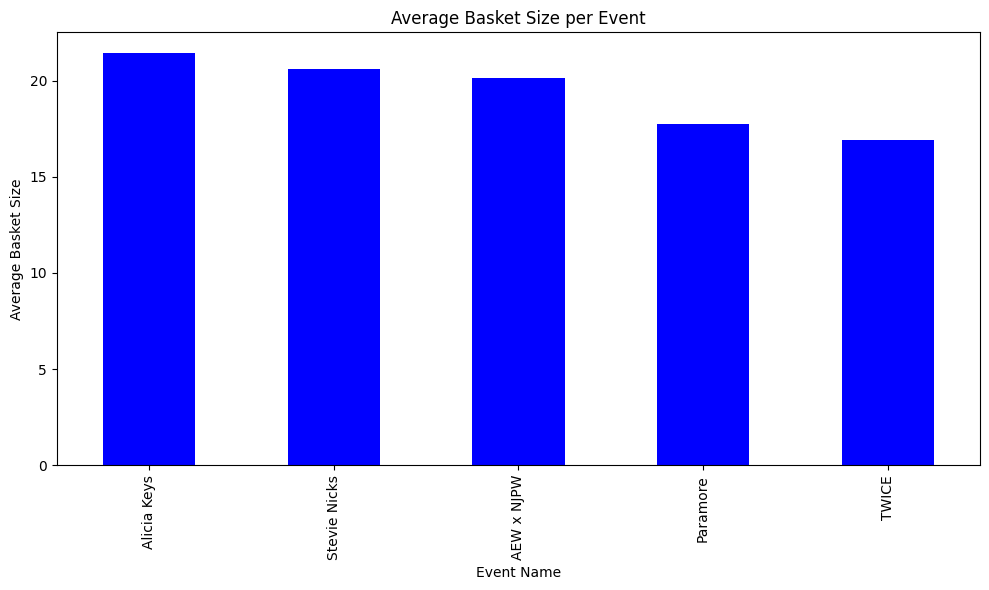

In [ ]:
# Sort the average basket size values in descending order
average_basket_size_sorted = average_basket_size.sort_values(ascending=False)

# Create the bar plot
fig, ax = plt.subplots(figsize=(10, 6))
average_basket_size_sorted.plot(kind='bar', color='blue', ax=ax)

# Customize the plot
ax.set_xlabel('Event Name')
ax.set_ylabel('Average Basket Size')
ax.set_title('Average Basket Size per Event')
ax.tick_params(axis='x', rotation=90)

# Display the plot
plt.tight_layout()
plt.show()

Average Revenue, Basket Size, and Count of Transactions

In [ ]:
#Average Revenue
av_rev = revenue_center_sales.mean()

#Average Basket size
av_bs = average_basket_size.mean()

#Average CT
av_ct = number_of_transactions.mean()

print("The total average revenue is:", av_rev)
print()
print("The total average basket size is:", av_bs)
print()
print("The total average count of transactions is:", av_ct)

The total average revenue is: 4889.663

The total average basket size is: 22.865473381199884

The total average count of transactions is: 170.25


Top 5 Products Grouped by Event

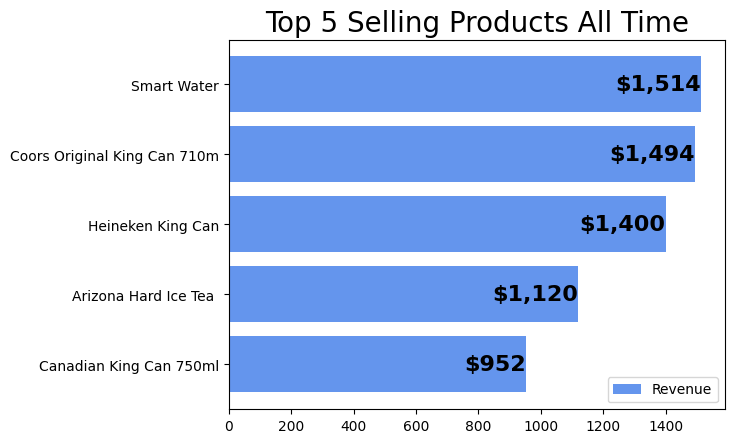

The top 5 selling items account for 39% of total sales.


In [ ]:
top5_df = menu_mix.groupby('Menu Item Name')['Sales Total'].sum().reset_index().sort_values(by='Sales Total', ascending=False).head(5) # Group the menu_mix dataframe by 'Menu Item Name' and sum the 'Sales Total' column for each group

top5_df['Menu Item Name'] = top5_df['Menu Item Name'].apply(lambda x: x.split(',', 1)[-1]) # Remove characters before the first comma

x1_top5 = top5_df['Sales Total'].tolist() # Get the top 5 items in terms of total sales and reverse the order
x1_top5.reverse()
y_top5 = top5_df['Menu Item Name'].tolist() # Get the names of the top 5 items and reverse the order
y_top5 = [item.split(',', 2)[-1] for item in top5_df['Menu Item Name']] #This list comprehension splits each item in top5_df['Menu Item Name'] at the comma, and only keeps the second item onwards (specified by [-1]).
y_top5.reverse()

# Set the locale for formatting numbers with commas
locale.setlocale(locale.LC_ALL, '')

# Format the sales values with commas
x1_top5_formatted = [locale.format_string("%d", value, grouping=True) for value in x1_top5]

b1 = plt.barh(y_top5, x1_top5, color="cornflowerblue") # create a horizontal bar chart with the top 5 best selling products and their retail values
plt.legend(b1, ["Revenue"], loc="lower right") # add a legend to the chart

# Add title to the chart
plt.title("Top 5 Selling Products All Time", fontsize = 20)

# add the retail values as text to each bar of the chart
for i, v in enumerate(x1_top5):
    plt.text(v, i, "${}".format(x1_top5_formatted[i]), color='black', fontweight='bold', fontsize=16, ha='right', va='center')

plt.show()

# calculate total sales
total_sales = menu_mix['Sales Total'].sum()

# sum up the sales total of the top 5 items
top5_sales = top5_df['Sales Total'].sum()

# calculate the percentage of total sales made by the top 5 items
percent_top5_sales = (top5_sales / total_sales) * 100

print("The top 5 selling items account for {:.0f}% of total sales.".format(percent_top5_sales))


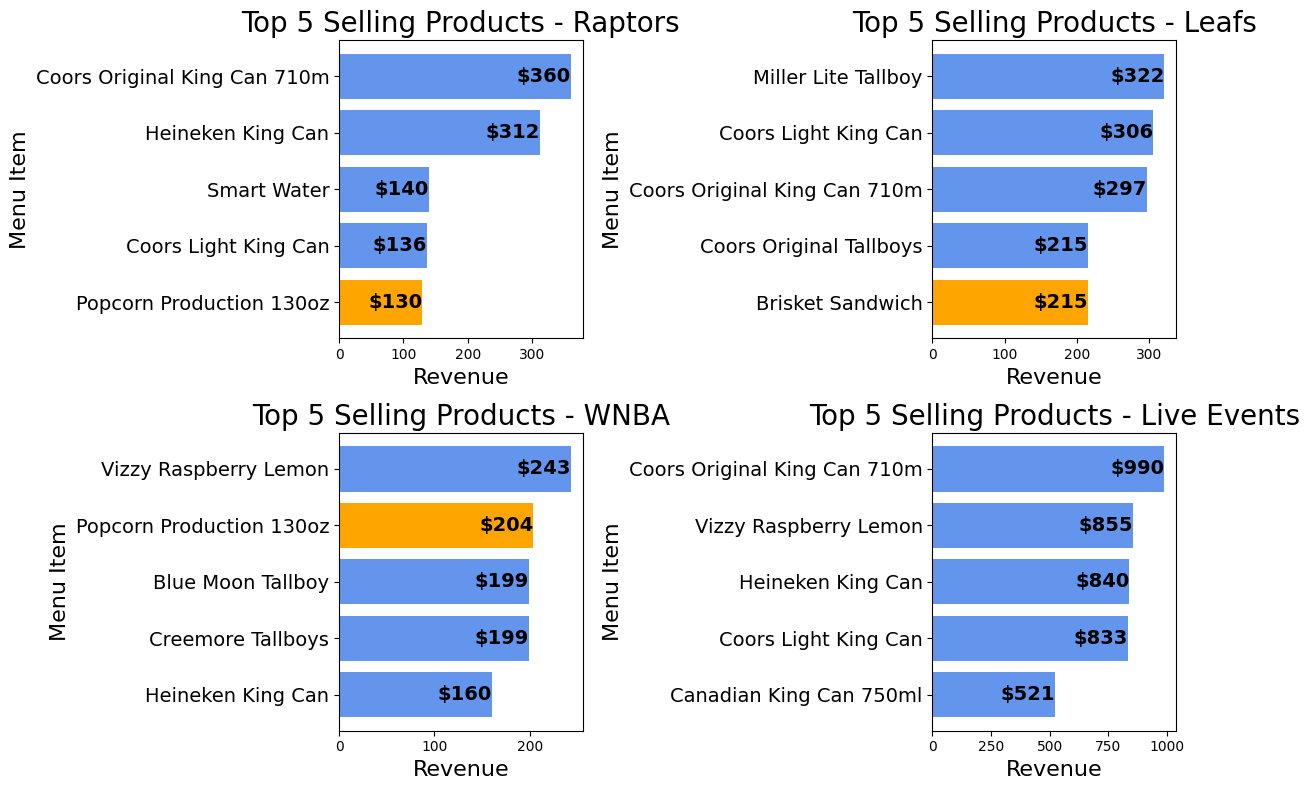

In [ ]:
# Filter the menu_mix DataFrame for each category and calculate the top 5 selling products
raptors_df = menu_mix[menu_mix['Event Group'] == 'Raptors'].groupby('Menu Item Name')['Sales Total'].mean().reset_index().sort_values(by='Sales Total', ascending=False).head(5)
leafs_df = menu_mix[menu_mix['Event Group'] == 'Leafs'].groupby('Menu Item Name')['Sales Total'].mean().reset_index().sort_values(by='Sales Total', ascending=False).head(5)
live_event_df = menu_mix[menu_mix['Event Group'] == 'Live Events'].groupby('Menu Item Name')['Sales Total'].mean().reset_index().sort_values(by='Sales Total', ascending=False).head(5)
wnba_df = menu_mix[menu_mix['Event Group'] == 'WNBA'].groupby('Menu Item Name')['Sales Total'].mean().reset_index().sort_values(by='Sales Total', ascending=False).head(5)

# Modify the data for each category to use in the bar chart
raptors_x = raptors_df['Sales Total'].tolist()
raptors_x.reverse()
raptors_y = [item.split(',', 2)[-1] for item in raptors_df['Menu Item Name']]
raptors_y.reverse()

leafs_x = leafs_df['Sales Total'].tolist()
leafs_x.reverse()
leafs_y = [item.split(',', 2)[-1] for item in leafs_df['Menu Item Name']]
leafs_y.reverse()

live_event_x = live_event_df['Sales Total'].tolist()
live_event_x.reverse()
live_event_y = [item.split(',', 2)[-1] for item in live_event_df['Menu Item Name']]
live_event_y.reverse()

wnba_x = wnba_df['Sales Total'].tolist()
wnba_x.reverse()
wnba_y = [item.split(',', 2)[-1] for item in wnba_df['Menu Item Name']]
wnba_y.reverse()

# Create subplots for each category
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.6)

# Plot the bar chart for Raptors
colors = ["cornflowerblue"] * len(raptors_y)
colors[0] = "orange"  # Set the 5th bar color to orange

axs[0, 0].barh(raptors_y, raptors_x, color=colors)
axs[0, 0].set_title("Top 5 Selling Products - Raptors", fontsize = 20)
axs[0, 0].set_xlabel("Revenue", fontsize = 16)
axs[0, 0].set_ylabel("Menu Item", fontsize = 16)
axs[0, 0].tick_params(axis='y', labelsize=14)  # Increase Y-axis label font size

for i, v in enumerate(raptors_x):
    axs[0, 0].text(v, i, "${:.0f}".format(v), color='black', fontweight='bold', fontsize=14, ha='right', va='center')

# Plot the bar chart for Leafs
colors = ["cornflowerblue"] * len(leafs_y)
colors[0] = "orange"  # Set the 5th bar color to orange

axs[0, 1].barh(leafs_y, leafs_x, color=colors)
axs[0, 1].set_title("Top 5 Selling Products - Leafs", fontsize = 20)
axs[0, 1].set_xlabel("Revenue", fontsize = 16)
axs[0, 1].set_ylabel("Menu Item", fontsize = 16)
axs[0, 1].tick_params(axis='y', labelsize=14)  # Increase Y-axis label font size

for i, v in enumerate(leafs_x):
    axs[0, 1].text(v, i, "${:.0f}".format(v), color='black', fontweight='bold', fontsize=14, ha='right', va='center')

# Plot the bar chart for WNBA
colors = ["cornflowerblue"] * len(wnba_y)
colors[3] = "orange"  # Set the 5th bar color to orange

axs[1, 0].barh(wnba_y, wnba_x, color=colors)
axs[1, 0].set_title("Top 5 Selling Products - WNBA", fontsize = 20)
axs[1, 0].set_xlabel("Revenue", fontsize = 16)
axs[1, 0].set_ylabel("Menu Item", fontsize = 16)
axs[1, 0].tick_params(axis='y', labelsize=14)  # Increase Y-axis label font size

for i, v in enumerate(wnba_x):
    axs[1, 0].text(v, i, "${:.0f}".format(v), color='black', fontweight='bold', fontsize=14, ha='right', va='center')

# Plot the bar chart for Live Events
axs[1, 1].barh(live_event_y, live_event_x, color="cornflowerblue")
axs[1, 1].set_title("Top 5 Selling Products - Live Events", fontsize = 20)
axs[1, 1].set_xlabel("Revenue", fontsize = 16)
axs[1, 1].set_ylabel("Menu Item", fontsize = 16)
axs[1, 1].tick_params(axis='y', labelsize=14)  # Increase Y-axis label font size

# Add the values as text to each bar of the Live Events subplot
for i, v in enumerate(live_event_x):
    axs[1, 1].text(v, i, "${:.0f}".format(v), color='black', fontweight='bold', fontsize=14, ha='right', va='center')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()
